# Outlier detection and removal using Z-Score and Standard Deviation

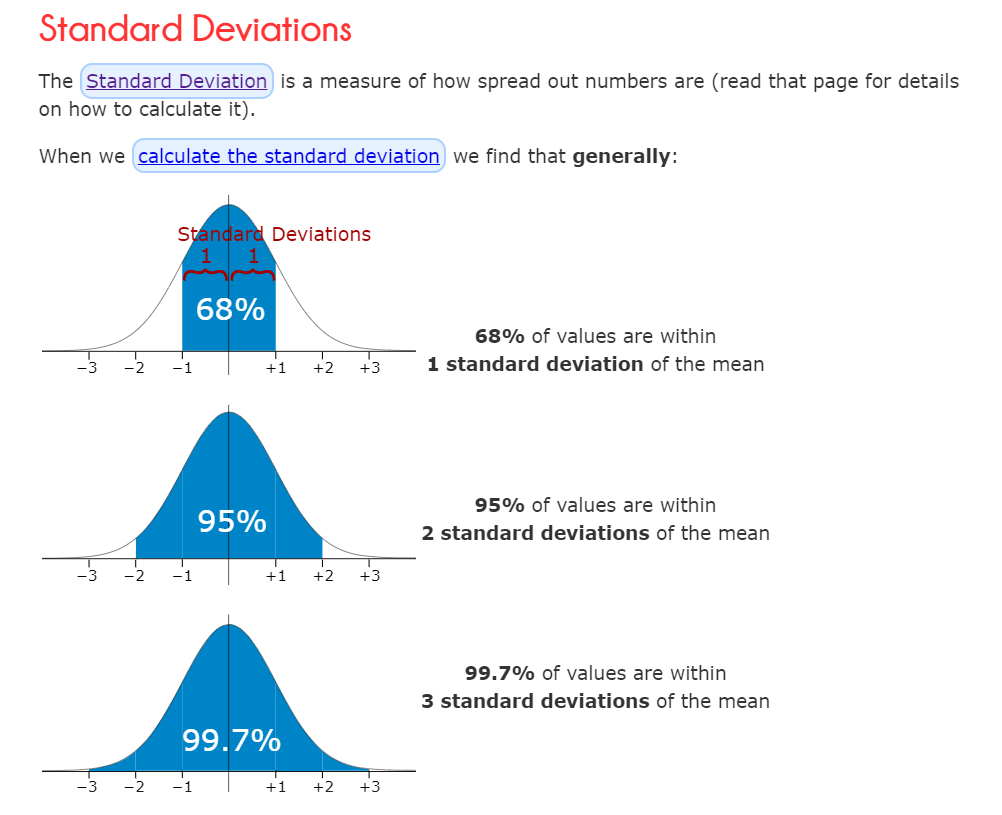

## Normal Distribution
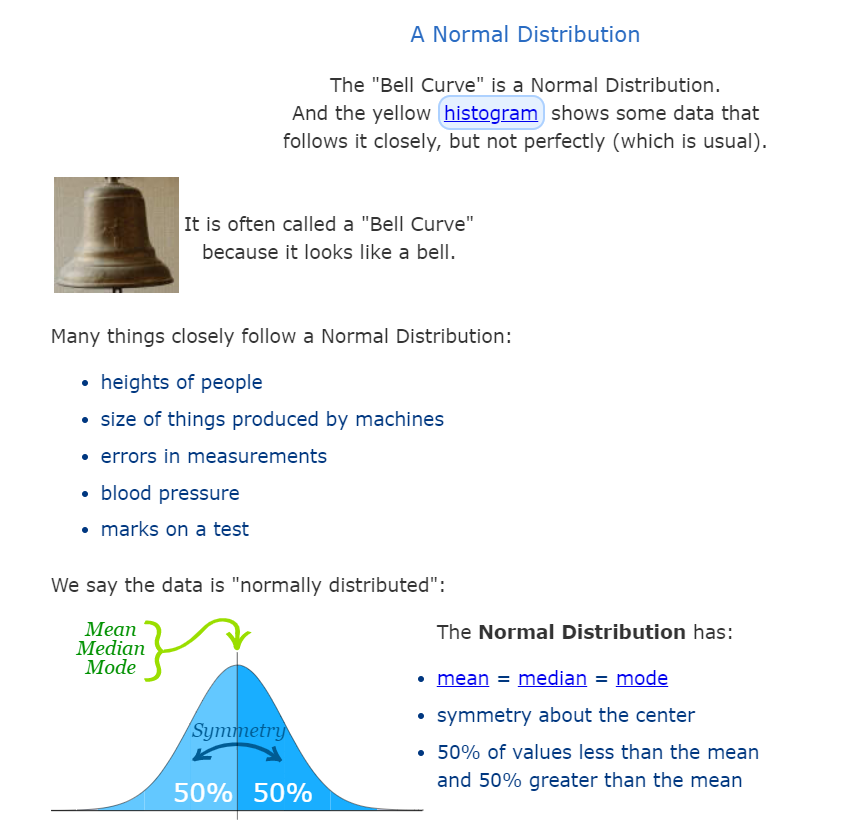

__Reference :__ \
https://www.mathsisfun.com/data/standard-normal-distribution.html \
https://www.mathsisfun.com/data/standard-deviation.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)    # Fix plot size

In [2]:
df = pd.read_csv("Datasets/heights_02.csv")
df.sample(5)

,gender,height
929,Male,62.709304
8597,Female,62.173708
9526,Female,60.096442
5143,Female,68.006804
9339,Female,66.943833


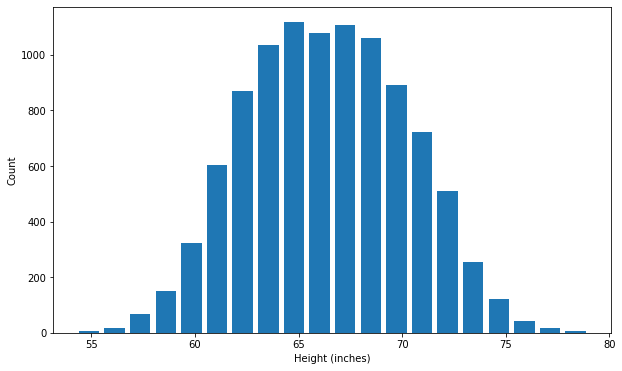

In [3]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

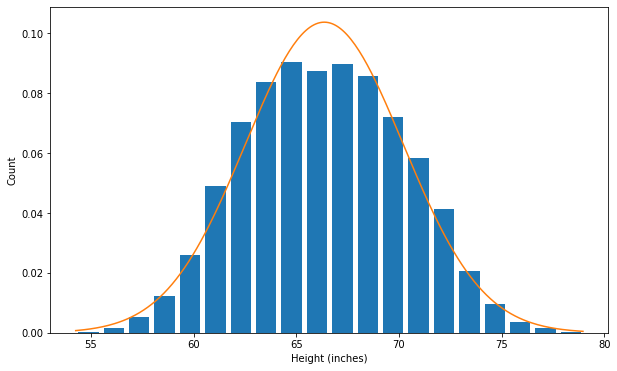

In [4]:
# PLot bell curve
from scipy.stats import norm

plt.hist(df.height, bins=20, rwidth=0.8, density=True)  # bins - no. of bars
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [5]:
df.height.mean(), df.height.std()

(66.367559754866, 3.847528120795573)

## (1) Outlier detection and removal using 3 standard deviation
One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. 

In [6]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [7]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

54.824975392479274

In [8]:
# Outliers beyond 3 Standard Deviation
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers.

In [9]:
# Now remove these outliers and generate new dataframe

df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [10]:
df_no_outlier_std_dev.shape

(9993, 2)

In [11]:
df.shape

(10000, 2)

### Thus, We have removed 7 Outliers.

## (2) Outlier detection and removal using Z Score
__Z score indicates how many standard deviation away a data point is.__ 

For example in our case mean is 66.37 and standard deviation is 3.84. \
If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away.(77.91 = 66.37 + 3 * 3.84)
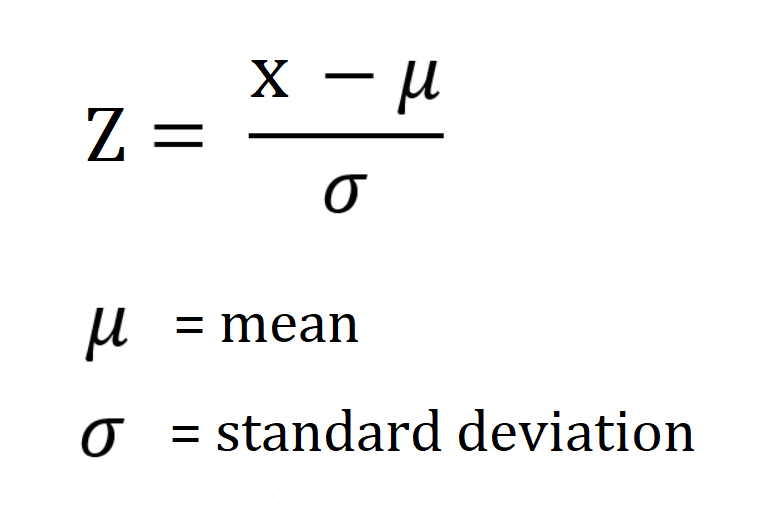

In [12]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean.

In [13]:
(73.84-66.37)/3.84

1.9453124999999998

### Get data points that has z score higher than 3 or lower than -3. ie., Get the data points that 3 standard deviation away.

In [14]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [15]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [16]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [17]:
# Remove outliers
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [18]:
df_no_outliers.shape

(9993, 3)

In [19]:
df.shape

(10000, 3)

### Thus, We have removed 7 Outliers.